My project is to identify the average quality of restaurants near addresses for the benefit of people looking to raise families in a different neighborhoods, college students choosing between apartments, and similar groups that would want an idea of the general quality of meals they could find if they moved to a specific address. I envision this as part of a suite of tools designed to help assist in planning moves which could be licensed for a small monthly cost, then hopefully forgotten about when the move is done so the company just keeps getting a few bucks every month like a bloodsucking tick. No, I am not bitter about losing several hundred dollars to a gym with this business model.

The data used is Foursquare's. Restaurants near an address are identified, their ratings are found, and then averaged.

In [111]:
#Import all the neccessary libraries
import pandas as pd
import numpy as np
import requests
import json # library to handle JSON files


import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans


import folium # map rendering library

import geopy
from geopy.geocoders import Nominatim



In [73]:
#Functions for managing data
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']
    
def getNearbyVenues(names, latitudes, longitudes, radius=5000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name'], v['venue']['id']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Address', 
                  'Address Latitude', 
                  'Address Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category',
                  'Venue ID']
    
    return(nearby_venues)    

In [97]:
#create dataframe of addresses and their latitudes and longitudes

addressFrame = pd.DataFrame(columns = ['Address','Latitude','Longitude'])

address = ""

while address != "Done" or address != 'done':
    print("Please enter an address you wish to investigate, or enter Done if you have no more addresses to investigate:")
    address = input()
    #print(address)
    if address == "Done" or address == 'done':
        break


    try:
        locator = Nominatim(user_agent='myGeocoder')
        location = locator.geocode(address)
        latitude, longitude = location.latitude, location.longitude
        addressFrame_length = len(addressFrame)
        addressFrame.loc[addressFrame_length] = [address,latitude,longitude]
    except:
        print("The address entered was invalid")
    
    
addressFrame
    

Please enter an address you wish to investigate, or enter Done if you have no more addresses to investigate:
510 Leopard Road Berwyn, PA 19132
Please enter an address you wish to investigate, or enter Done if you have no more addresses to investigate:
304 Collingdale Ave Darby, Pennsylvania, 19023
The address entered was invalid
Please enter an address you wish to investigate, or enter Done if you have no more addresses to investigate:
304 Collingdale Ave Darby, Pennsylvania, 19023
The address entered was invalid
Please enter an address you wish to investigate, or enter Done if you have no more addresses to investigate:
1362 Virden Dr Greenwood, Mississippi, 38930
The address entered was invalid
Please enter an address you wish to investigate, or enter Done if you have no more addresses to investigate:
1362 Virden Drive Greenwood, Mississippi(MS), 38930
The address entered was invalid
Please enter an address you wish to investigate, or enter Done if you have no more addresses to invest

,Address,Latitude,Longitude
0,"510 Leopard Road Berwyn, PA 19132",40.030139,-75.450037
1,"1515 Clay Street Oakland, CA 94612",37.806163,-122.273149


In [98]:
CLIENT_ID = 'PF2LTMIMZD24S4LRCYU4U0FMPHF0JCVCEHEBMOSUGK2WQYRR' # your Foursquare ID
CLIENT_SECRET = 'TB5YFEMANIL4YQ5QEODD5BQVVMCUREYWS24XTA23NXWIHVWD' # your Foursquare Secret
ACCESS_TOKEN = 'GZLVX52T2UXNW3NKX3GRVWJCYWPQIVOHFP1T4KNOUJ2Y4KQ5' # your FourSquare Access Token
VERSION = '20180604'
LIMIT = 100

In [99]:
addressVenues= getNearbyVenues(addressFrame["Address"],addressFrame["Latitude"],addressFrame["Longitude"])

addressVenues
    

510 Leopard Road Berwyn, PA 19132
1515 Clay Street Oakland, CA 94612


,Address,Address Latitude,Address Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,Venue ID
0,"510 Leopard Road Berwyn, PA 19132",40.030139,-75.450037,Nectar,40.044085,-75.450284,Asian Restaurant,4b08cac8f964a5204a1223e3
1,"510 Leopard Road Berwyn, PA 19132",40.030139,-75.450037,Em J's Cafe,40.045693,-75.446096,American Restaurant,4f1232304fc64b8694f994ab
2,"510 Leopard Road Berwyn, PA 19132",40.030139,-75.450037,Clays Creative Corner Bakery,40.047339,-75.443241,Bakery,4b50cc6ef964a520083327e3
3,"510 Leopard Road Berwyn, PA 19132",40.030139,-75.450037,Handel's Homemade Ice Cream & Yogurt,40.047979,-75.438876,Ice Cream Shop,4b7b563cf964a520e75e2fe3
4,"510 Leopard Road Berwyn, PA 19132",40.030139,-75.450037,La Cabra Brewing,40.047774,-75.441677,Brewery,5712af3f498e79efe781cd84
...,...,...,...,...,...,...,...,...
191,"1515 Clay Street Oakland, CA 94612",37.806163,-122.273149,7th West,37.804128,-122.290732,Bar,5b81bfea8194fc002c2a71b5
192,"1515 Clay Street Oakland, CA 94612",37.806163,-122.273149,Grand Lake Theater,37.811444,-122.247767,Movie Theater,4a3304acf964a520f19a1fe3
193,"1515 Clay Street Oakland, CA 94612",37.806163,-122.273149,PsPrint,37.822320,-122.289417,Print Shop,49b58a19f964a520fb521fe3
194,"1515 Clay Street Oakland, CA 94612",37.806163,-122.273149,Old Crow Tattoo & Gallery,37.809040,-122.255424,Tattoo Parlor,4c82dcead34ca14363ad3080


With the list of venues created, all non-restaurant entires are removed.

In [100]:
restaurantFrame = pd.DataFrame(columns = ['Address','Restaurant Name'])
idFrame = pd.DataFrame(columns = ['Restaurant ID'])

typeList = ["Restaurant", "Joint"]

for index, row in addressVenues.iterrows():
    for i in typeList:
        if i in str(row[-2]):
            
            restaurantFrame_length = len(restaurantFrame)
            restaurantFrame.loc[restaurantFrame_length] = [row[0], row[-2]]
            idFrame_length = len(idFrame)
            idFrame.loc[idFrame_length] = row[-1]                              

restaurantFrame = restaurantFrame.join(idFrame)
restaurantFrame

,Address,Restaurant Name,Restaurant ID
0,"510 Leopard Road Berwyn, PA 19132",Asian Restaurant,4b08cac8f964a5204a1223e3
1,"510 Leopard Road Berwyn, PA 19132",American Restaurant,4f1232304fc64b8694f994ab
2,"510 Leopard Road Berwyn, PA 19132",Italian Restaurant,4b4e5653f964a520f1e926e3
3,"510 Leopard Road Berwyn, PA 19132",Mexican Restaurant,5aa171530a464d6dd81ac01f
4,"510 Leopard Road Berwyn, PA 19132",Taiwanese Restaurant,591f79b31499462d626f8a06
5,"510 Leopard Road Berwyn, PA 19132",Italian Restaurant,4ba82ee2f964a520f4cf39e3
6,"510 Leopard Road Berwyn, PA 19132",New American Restaurant,5739ec7d498ee377a5a2a480
7,"510 Leopard Road Berwyn, PA 19132",Japanese Restaurant,4b2d54fff964a52064d424e3
8,"510 Leopard Road Berwyn, PA 19132",American Restaurant,4a970507f964a520032820e3
9,"510 Leopard Road Berwyn, PA 19132",Restaurant,5612663e498ec183ec777035


FourSquare is called to find the rating for each restaurant.

In [106]:
resultFrame = pd.DataFrame(columns = ["Restaurant Rating"])

for index, row in restaurantFrame.iterrows():

    venue_id = row[-1]
    
    url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&oauth_token={}&v={}'.format(venue_id, CLIENT_ID, CLIENT_SECRET,ACCESS_TOKEN, VERSION)
    result = requests.get(url).json()
    try:
            resultFrame_length = len(resultFrame)
            resultFrame.loc[resultFrame_length] = float(result['response']['venue']['rating']) 
    except:

            resultFrame_length = len(resultFrame)
            resultFrame.loc[resultFrame_length] = np.nan
 

restaurantFrame = restaurantFrame.merge(resultFrame, how = 'left')
restaurantFrame["Restaurant Rating"] = pd.to_numeric(restaurantFrame["Restaurant Rating"], downcast="float")
restaurantFrame

,Address,Restaurant Name,Restaurant ID,Restaurant Rating
0,"510 Leopard Road Berwyn, PA 19132",Asian Restaurant,4b08cac8f964a5204a1223e3,8.9
1,"510 Leopard Road Berwyn, PA 19132",American Restaurant,4f1232304fc64b8694f994ab,8.6
2,"510 Leopard Road Berwyn, PA 19132",Italian Restaurant,4b4e5653f964a520f1e926e3,8.5
3,"510 Leopard Road Berwyn, PA 19132",Mexican Restaurant,5aa171530a464d6dd81ac01f,8.6
4,"510 Leopard Road Berwyn, PA 19132",Taiwanese Restaurant,591f79b31499462d626f8a06,8.8
...,...,...,...,...
3522,"1515 Clay Street Oakland, CA 94612",Mexican Restaurant,5d4a3477f583f0000832f188,8.7
3523,"1515 Clay Street Oakland, CA 94612",Southern / Soul Food Restaurant,5c6b41f53731ee002c3fa3c6,8.0
3524,"1515 Clay Street Oakland, CA 94612",Mexican Restaurant,5859c7b1cc5b6a63c428f8de,8.7
3525,"1515 Clay Street Oakland, CA 94612",Thai Restaurant,4a63eb4af964a52002c61fe3,8.8


In [110]:
restaurantFrame.drop(columns = ["Restaurant Name", "Restaurant ID"])
restaurantFrame.groupby(['Address']).mean()

,Restaurant Rating
Address,
"1515 Clay Street Oakland, CA 94612",8.39200
"510 Leopard Road Berwyn, PA 19132",7.64375


In [122]:
addList = []
rateList = []
meanFrame = restaurantFrame.groupby(['Address']).mean()
meanFrame = meanFrame.reset_index()

meanFrame

,Address,Restaurant Rating
0,"1515 Clay Street Oakland, CA 94612",8.39200
1,"510 Leopard Road Berwyn, PA 19132",7.64375


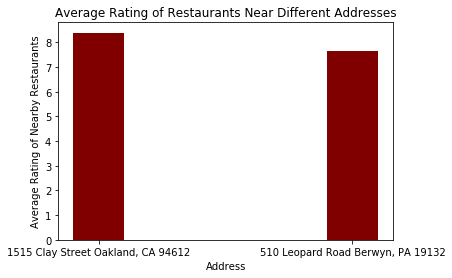

In [123]:
for index, row in meanFrame.iterrows():
    addList.append(row[0])
    rateList.append(row[1])

plt.bar(addList, rateList, color ='maroon',
        width = 0.2)
 
plt.xlabel("Address")
plt.ylabel("Average Rating of Nearby Restaurants")
plt.title("Average Rating of Restaurants Near Different Addresses")
plt.show()